## Understanding and Implementing K-Means and DBSCAN Algorithms

### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
### Datasets :
#### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
### Implementing Clustering Algorithms:
* Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
* Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
* Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

### Cluster Analysis and Interpretation:
* Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


### Visualization:
- Visualize the clustering results using scatter plots or other suitable visualization techniques.
- Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
### Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [89]:
import pandas as pd
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [90]:
df.drop(['ID#'], axis=1, inplace=True)

In [91]:
print(df.isnull().sum())

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [92]:
df = df.dropna()

In [93]:
# Detect and remove outliers using Z-score
import numpy as np
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
df = df[(z_scores < 3).all(axis=1)]
print(f"\nShape after removing outliers: {df.shape}")
# Removing all outliers from Qual_miles would erase valid extreme behaviors of frequent travelers.


Shape after removing outliers: (3630, 11)


In [94]:
print(df.describe())

             Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000           0.000000         0.0

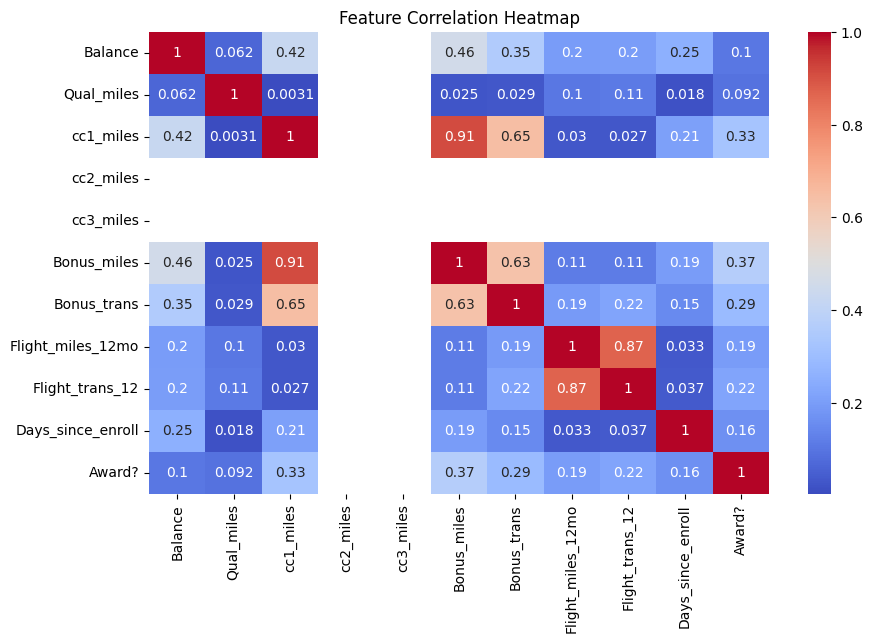

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

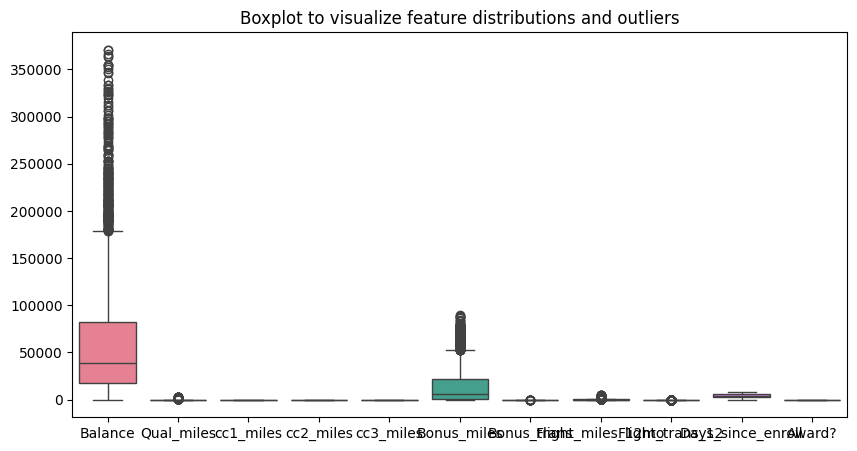

In [96]:
# Boxplot for Distribution and Outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot to visualize feature distributions and outliers")
plt.show()

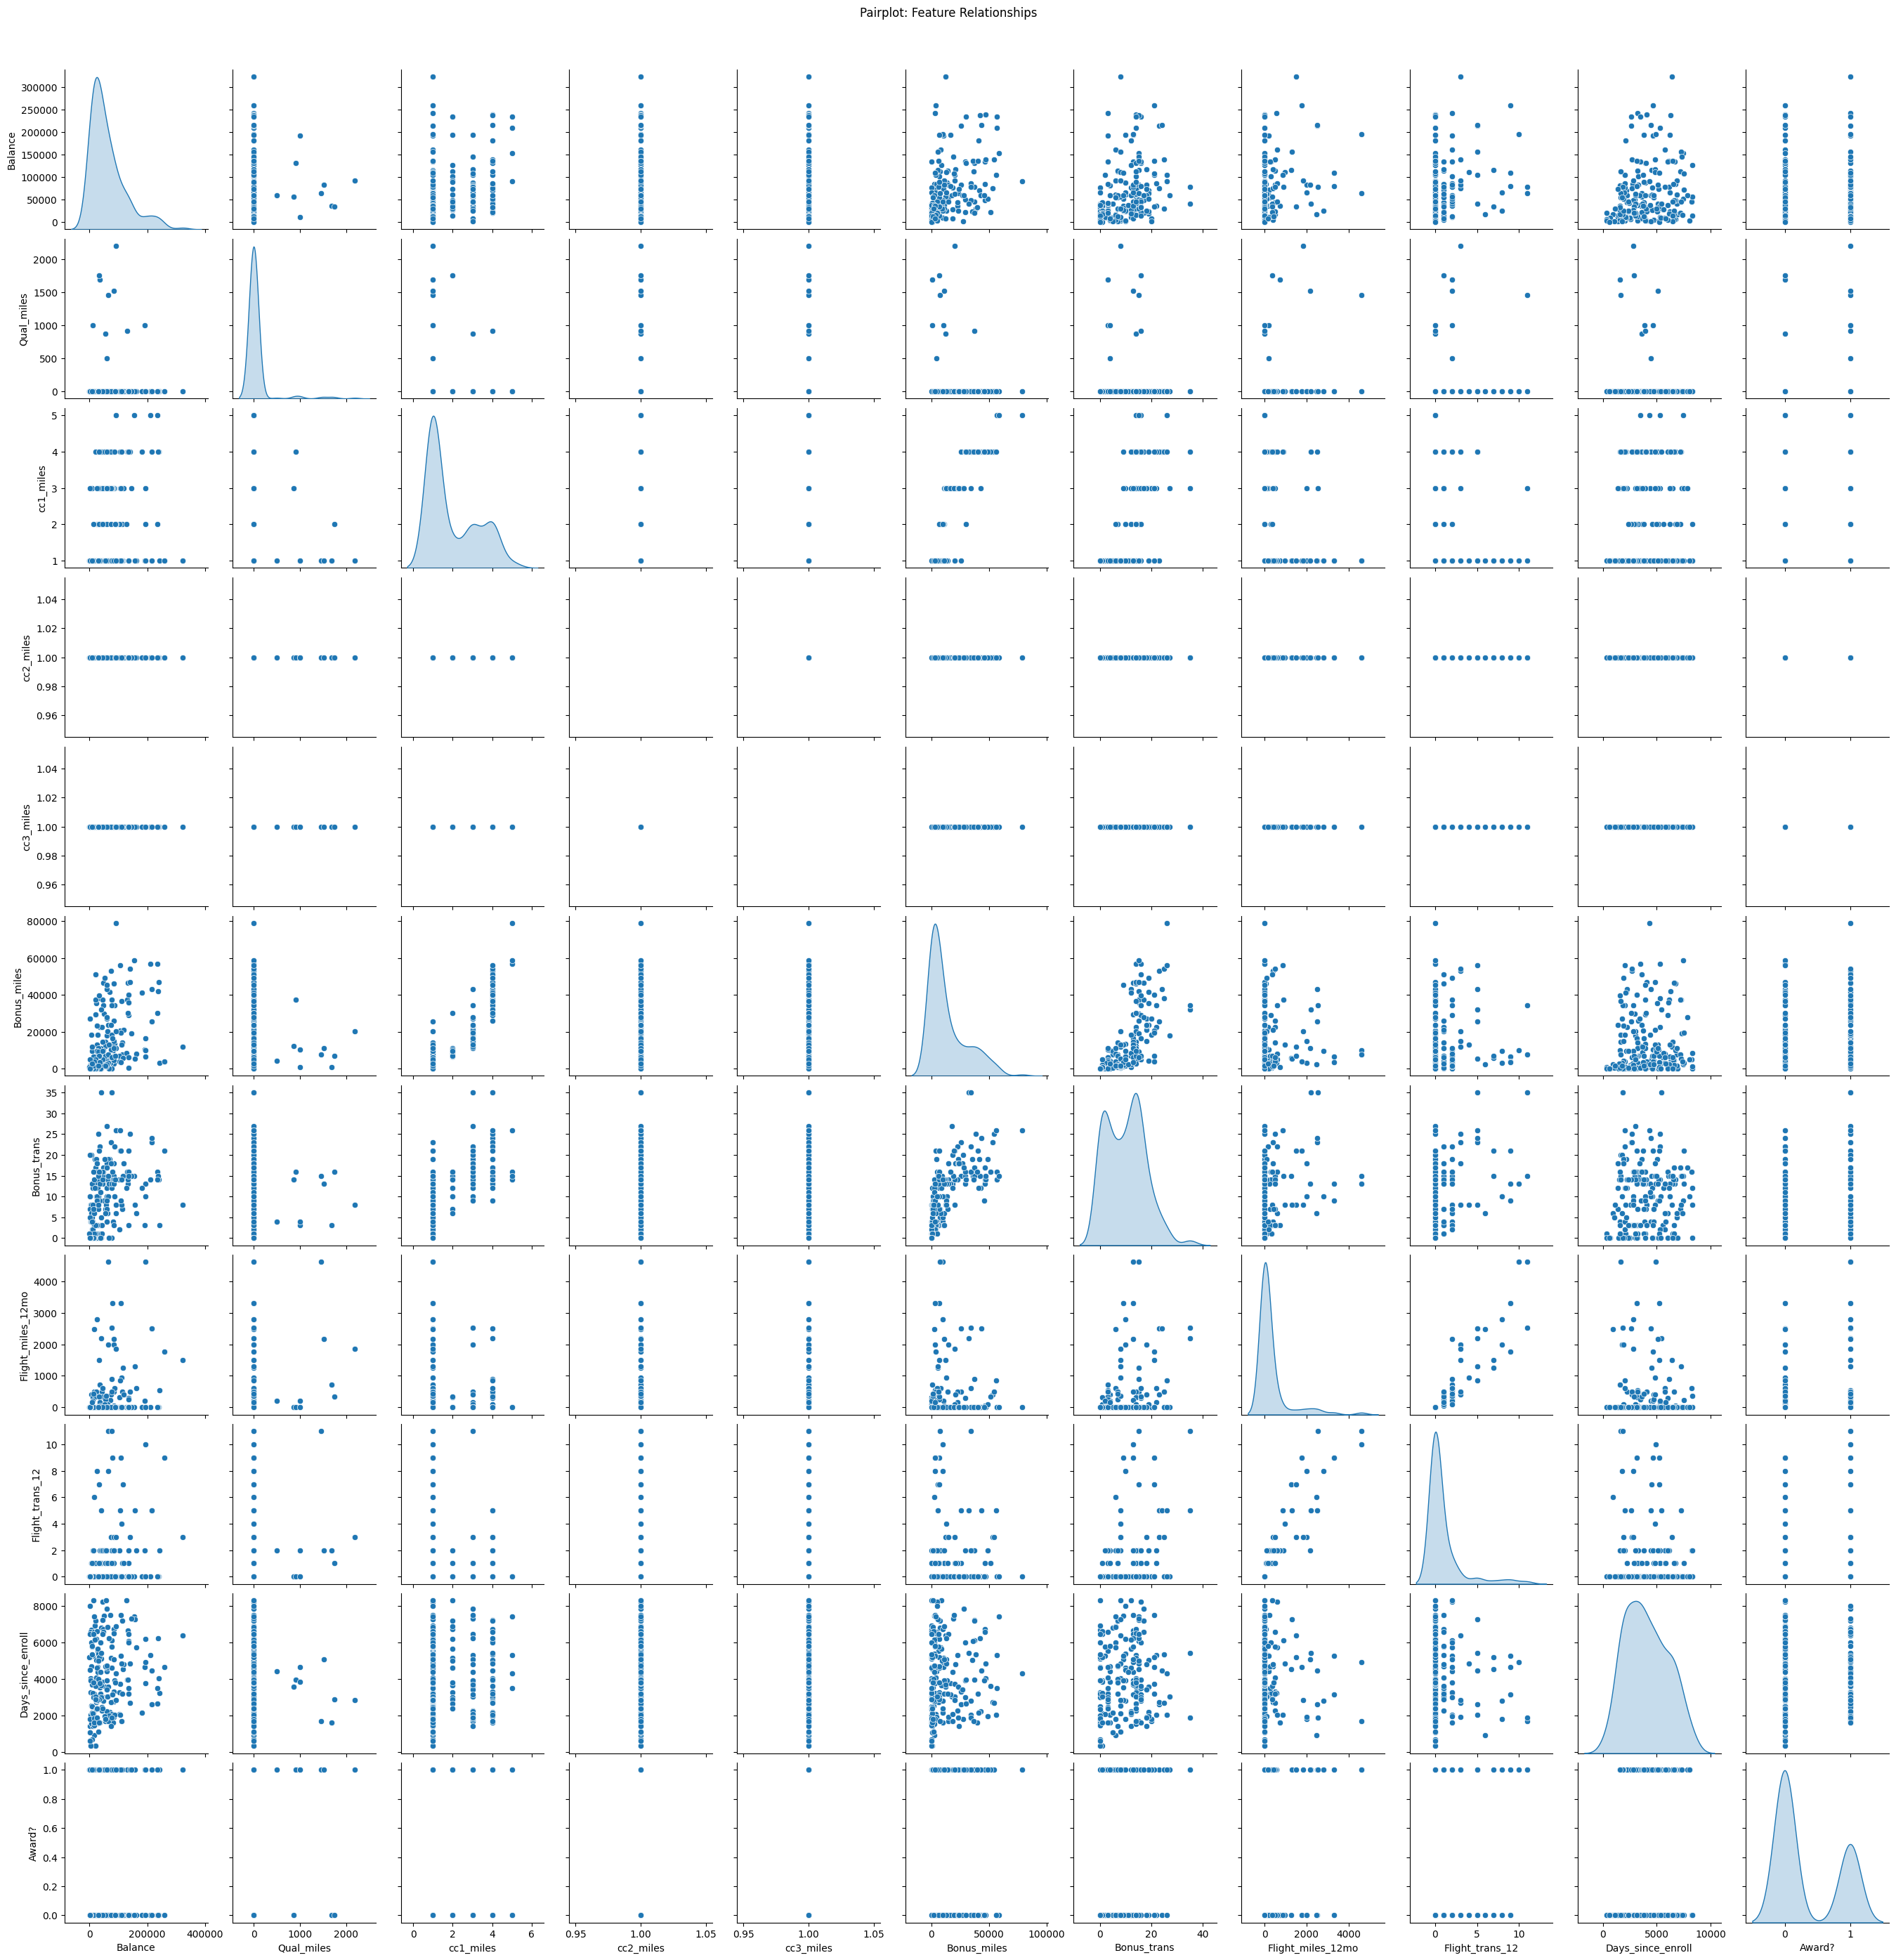

In [97]:
# Pairplot to visualize relationships
sns.pairplot(df.sample(200), diag_kind='kde')
plt.suptitle("Pairplot: Feature Relationships", y=1.02)
plt.show()

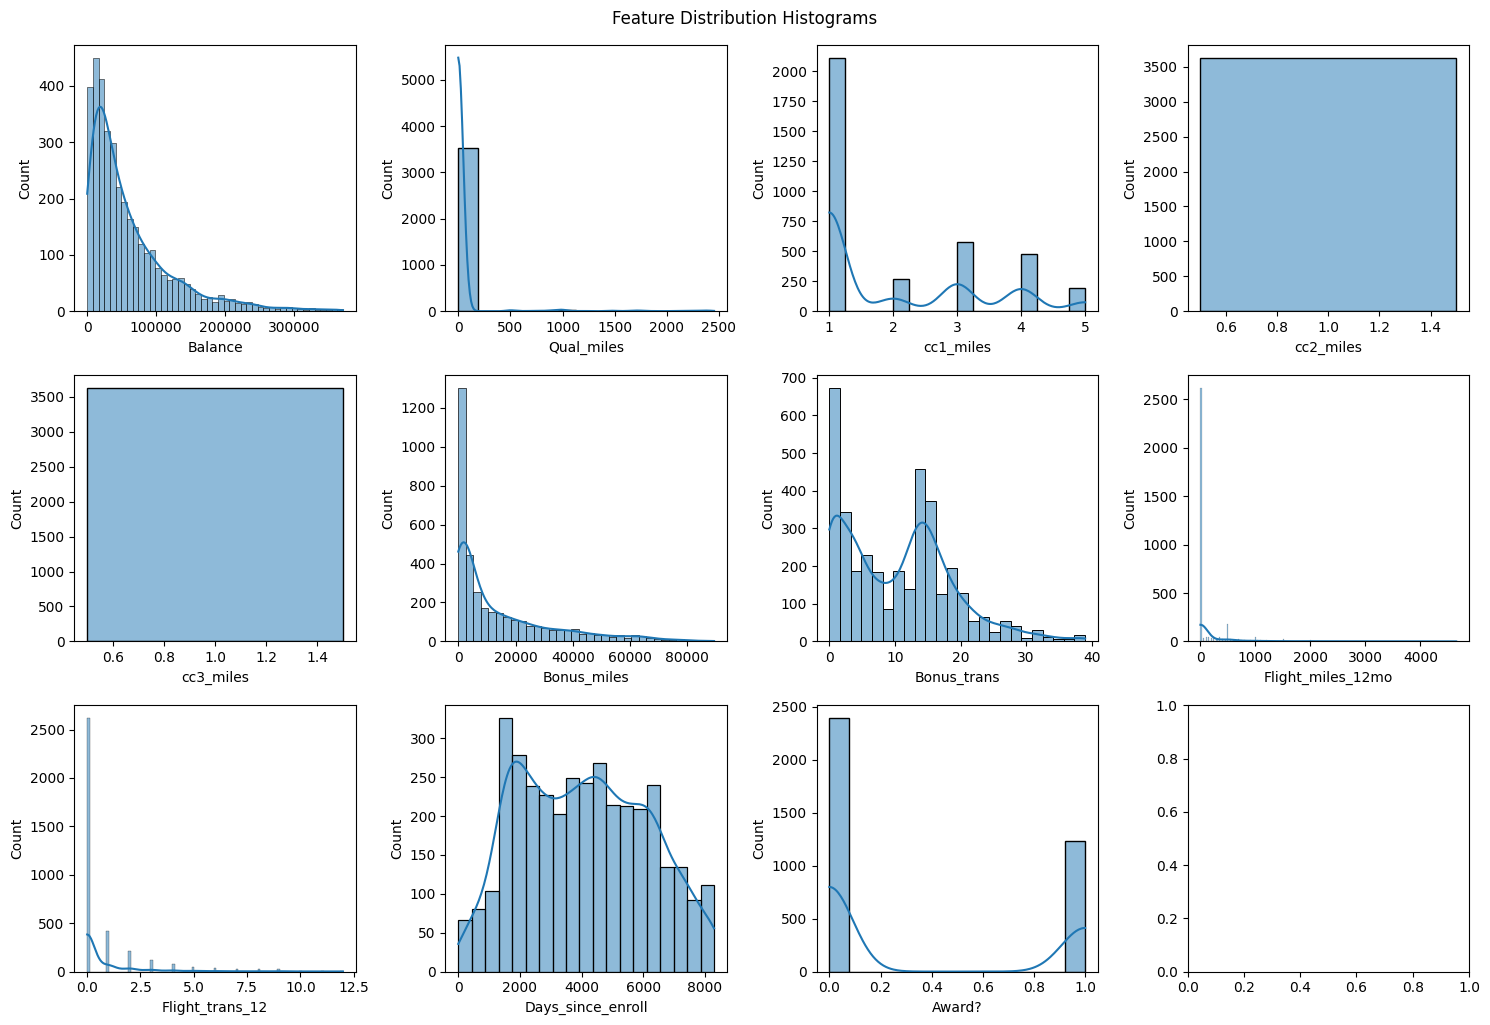

In [98]:
# Histograms for each feature
fig, axes = plt.subplots(3, 4, figsize=(15,10))
axes = axes.flatten()
for i, col in enumerate(df.columns[:16]):
    sns.histplot(df[col], kde=True, ax=axes[i])
plt.tight_layout()
plt.suptitle("Feature Distribution Histograms", y=1.02)
plt.show()

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

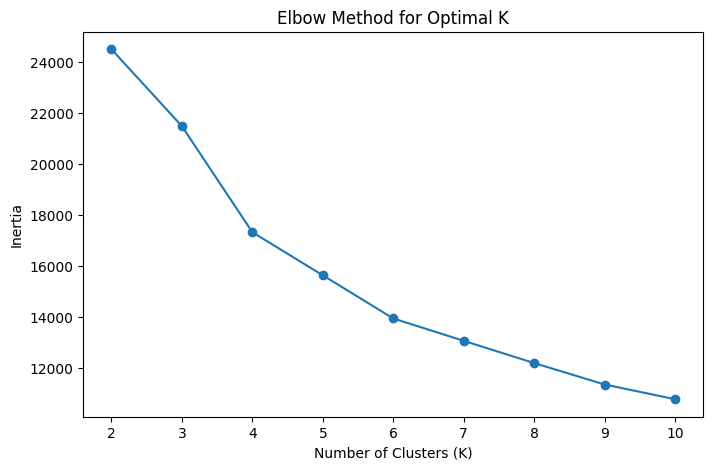

In [100]:
# Elbow Method to find optimal K
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

df['KMeans_Cluster'] = kmeans_labels

In [102]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
print(f"\nSilhouette Score (K-Means): {silhouette_kmeans:.3f}")


Silhouette Score (K-Means): 0.332


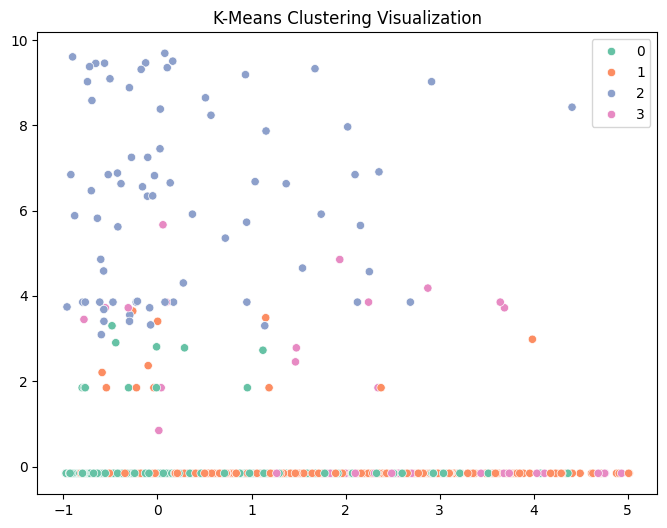

In [103]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_df[:,0], y=scaled_df[:,1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clustering Visualization")
plt.show()
# 0: Noise/Outliers
# 1: Moderate flyers
# 2: Frequent flyers
# 3: Premium flyers

In [104]:
# Applying DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = dbscan_labels

df['DBSCAN_Cluster']

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Name: DBSCAN_Cluster, Length: 3630, dtype: int64

In [105]:
mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(scaled_df[mask], dbscan_labels[mask])
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.3f}")
else:
    print("DBSCAN found no valid clusters (all noise).")

Silhouette Score (DBSCAN): 0.250


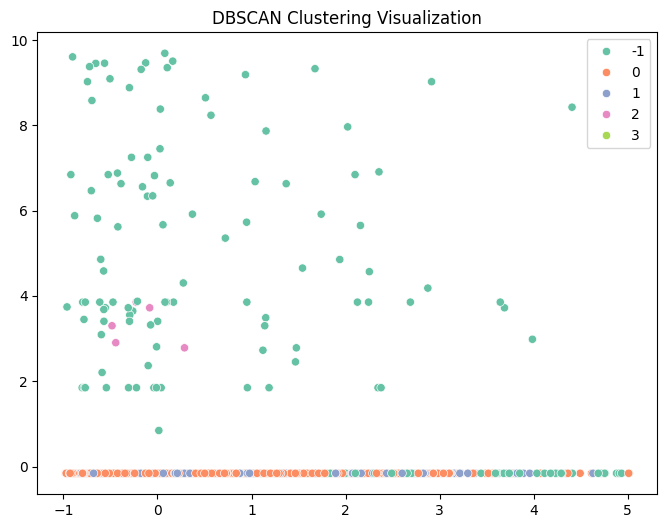

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_df[:,0], y=scaled_df[:,1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering Visualization")
plt.show()
# -1: Noise/Outliers
# 0: Moderate flyers
# 1: Frequent travelers
# 2: Low engagement
# 3: Premium members

In [107]:
print("\nCluster-wise Mean Values (DBSCAN):")
cluster_summary = df.groupby('DBSCAN_Cluster').mean()
print(cluster_summary)


Cluster-wise Mean Values (DBSCAN):
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                               
-1              118433.253012  559.706827   2.477912        1.0        1.0   
 0               53376.363795    0.000000   1.664189        1.0        1.0   
 1               62302.507834    0.000000   2.597235        1.0        1.0   
 2               48776.600000  865.000000   1.000000        1.0        1.0   
 3               70416.750000    0.000000   1.000000        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                  
-1              25458.550201    17.911647        1503.759036         4.257028   
 0               9074.874945     8.432007         105.956712         0.350678   
 1              22844.748387    13.070968         277.950230         0.878341   
 2          

In [108]:
print("Cluster Means (K-Means):")
print(df.groupby('KMeans_Cluster').mean())


print("\n\nCluster Distribution (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())

Cluster Means (K-Means):
                     Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               37033.132146     3.194002   1.139644        1.0        1.0   
1               94615.303030     6.099327   3.537879        1.0        1.0   
2               77728.083333  1616.847222   1.847222        1.0        1.0   
3               96005.461864    56.004237   2.042373        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                3544.908154     6.006560          93.823805         0.335052   
1               32600.534512    17.328283         143.514310         0.460438   
2               14244.125000    10.791667         468.708333         1.541667   
3               19432.966102    16.118644        2222.381356         6.258475   

                Day

In [109]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
print(f"\nSilhouette Score (K-Means): {silhouette_kmeans:.3f}")
silhouette_dbscan = silhouette_score(scaled_df[mask], dbscan_labels[mask])
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.3f}")



Silhouette Score (K-Means): 0.332
Silhouette Score (DBSCAN): 0.250


In conclusion, this clustering analysis helped us understand customer behavior patterns in the EastWestAirlines dataset using K-Means and DBSCAN algorithms. After cleaning, scaling, and exploring the data, we found that K-Means created clear and balanced groups, while DBSCAN identified irregular patterns and noise effectively. We kept natural outliers like in the “Qual_miles” feature since they represent genuine high-mileage customers. Overall, the clustering results provided useful insights into different types of airline customers based on their travel and loyalty habits.